In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

**Data Cleaning**

In [ ]:
data = pd.read_excel('/content/NMC_cycling_data.xlsx',skiprows=2)
data.head()

,Unnamed: 0,Ambient temperature,Discharging current,Depth of discharge,Average charging current,State of Health,dSOH/dNeq
0,cell_name,NaN,NaN,NaN,NaN,NaN,NaN
1,B2,15.0,-2.6,100.0,2.05,1.000,0.00000
2,NaN,15.0,-2.6,100.0,2.00,0.975,0.01146
3,NaN,15.0,-2.6,100.0,1.93,0.950,0.02222
4,8,15.0,-2.6,100.0,1.90,0.925,0.03184


In [ ]:
data.columns

Index(['Unnamed: 0', 'Ambient temperature', 'Discharging current',
       'Depth of discharge', 'Average charging current', 'State of Health',
       'dSOH/dNeq'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
data = data.iloc[1:, :].reset_index(drop=True)
data.head()

,Ambient temperature,Discharging current,Depth of discharge,Average charging current,State of Health,dSOH/dNeq
0,15.0,-2.6,100.0,2.05,1.000,0.00000
1,15.0,-2.6,100.0,2.00,0.975,0.01146
2,15.0,-2.6,100.0,1.93,0.950,0.02222
3,15.0,-2.6,100.0,1.90,0.925,0.03184
4,15.0,-2.6,100.0,1.86,0.900,0.06180


In [ ]:
data['C Rate'] = data['Discharging current']/-1.3
data.head()

,Ambient temperature,Discharging current,Depth of discharge,Average charging current,State of Health,dSOH/dNeq,C Rate
0,15.0,-2.6,100.0,2.05,1.000,0.00000,2.0
1,15.0,-2.6,100.0,2.00,0.975,0.01146,2.0
2,15.0,-2.6,100.0,1.93,0.950,0.02222,2.0
3,15.0,-2.6,100.0,1.90,0.925,0.03184,2.0
4,15.0,-2.6,100.0,1.86,0.900,0.06180,2.0


**LinReg Model**

In [ ]:
X = data[['Ambient temperature', 'Discharging current', 'Depth of discharge']]
y = data['dSOH/dNeq']

In [ ]:
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

In [ ]:
train_X = train_data[['Ambient temperature', 'Discharging current', 'Depth of discharge']]
train_y = train_data['dSOH/dNeq']
test_X = test_data[['Ambient temperature', 'Discharging current', 'Depth of discharge']]
test_y = test_data['dSOH/dNeq']

In [ ]:
lin_model = LinearRegression()
lin_model.fit(train_X,train_y)
y_pred = lin_model.predict(test_X)

In [ ]:
mse = np.mean((y_pred - test_y) ** 2)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.06072609484274896


**LinReg Visualization**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ValueError: ignored

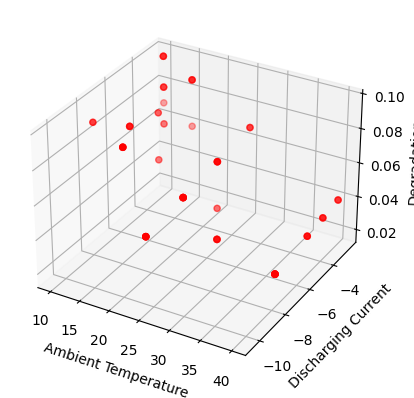

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_X['Ambient temperature'], test_X['Discharging current'], y_pred, c='r', marker='o')
ax.set_xlabel('Ambient Temperature')
ax.set_ylabel('Discharging Current')
ax.set_zlabel('Degradation')

x1, x2 = np.meshgrid(np.linspace(X['Ambient temperature'].min(), X['Ambient temperature'].max(), 10), np.linspace(X['Discharging current'].min(), X['Discharging current'].max(), 10))

ax.plot_surface(x1, x2, y_pred, color='b', alpha=0.5)

# show the plot
plt.show()